In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Preparando el data set
ruta = "Fifa_stats.csv"
df = pd.read_csv(ruta)
df.head()

,sofifa_id,long_name,dob,age,nationality,club,preferred_foot,height_cm,weight_kg,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,Lionel Andrés Messi Cuccittini,1987-06-24,32,Argentina,FC Barcelona,Left,170,72,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,34,Portugal,Juventus,Right,187,83,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar da Silva Santos Junior,1992-02-05,27,Brazil,Paris Saint-Germain,Right,175,68,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,Jan Oblak,1993-01-07,26,Slovenia,Atlético Madrid,Right,188,87,91,...,11,68,27,12,18,87,92,78,90,89
4,183277,Eden Hazard,1991-01-07,28,Belgium,Real Madrid,Right,175,74,91,...,88,91,34,27,22,11,12,6,8,8


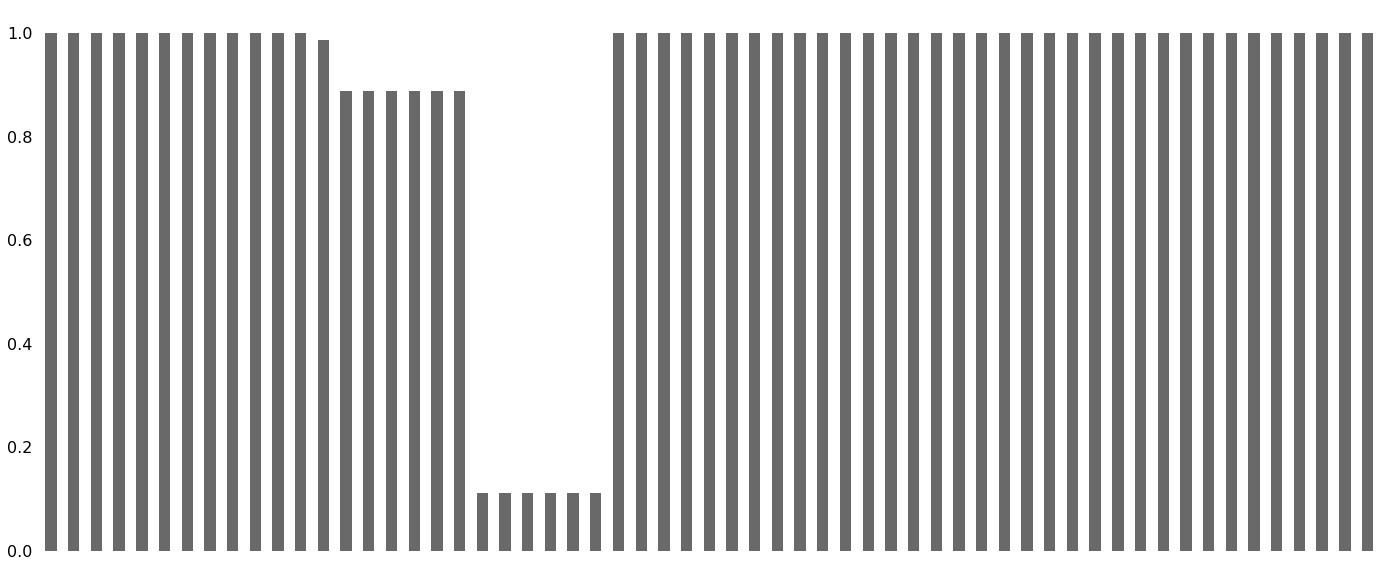

In [3]:
msno.bar(df)

In [4]:
df.columns[df.isnull().any()].tolist()
df.drop(columns=['team_jersey_number'],inplace=True)

In [5]:
df.replace({np.nan:0.0},inplace=True)
df.head()

,sofifa_id,long_name,dob,age,nationality,club,preferred_foot,height_cm,weight_kg,overall,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,Lionel Andrés Messi Cuccittini,1987-06-24,32,Argentina,FC Barcelona,Left,170,72,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,34,Portugal,Juventus,Right,187,83,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar da Silva Santos Junior,1992-02-05,27,Brazil,Paris Saint-Germain,Right,175,68,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,Jan Oblak,1993-01-07,26,Slovenia,Atlético Madrid,Right,188,87,91,...,11,68,27,12,18,87,92,78,90,89
4,183277,Eden Hazard,1991-01-07,28,Belgium,Real Madrid,Right,175,74,91,...,88,91,34,27,22,11,12,6,8,8


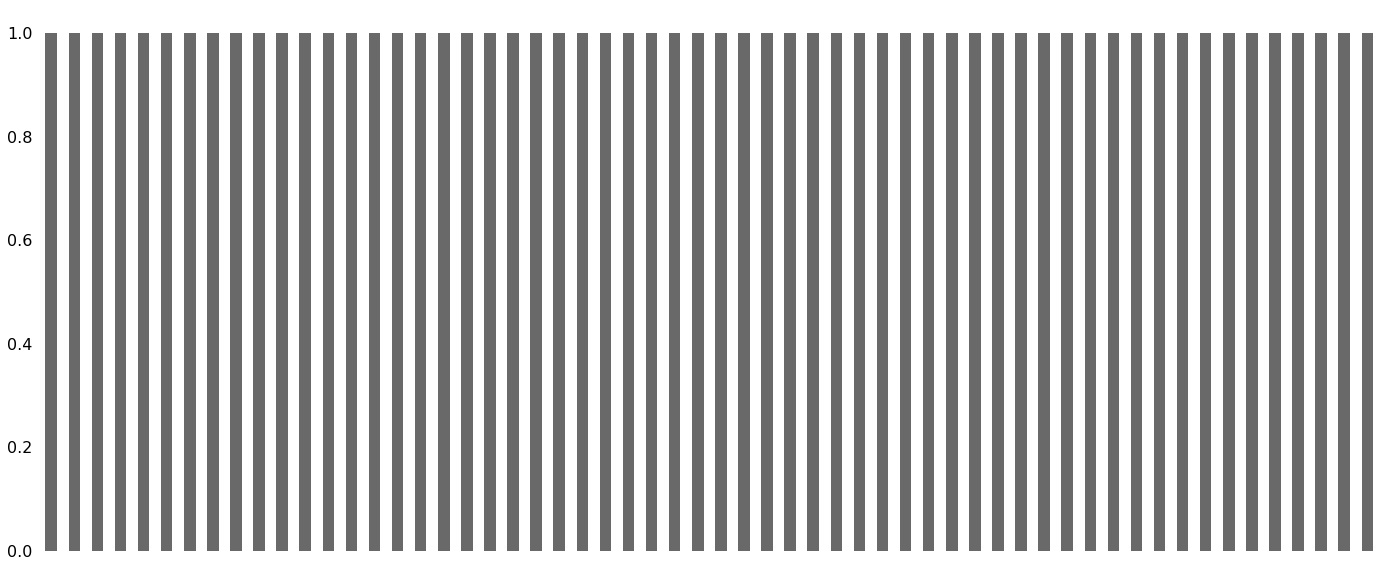

In [6]:
msno.bar(df)

In [7]:
X = df[list(df.describe().columns)]

In [8]:
X.drop(columns=['sofifa_id'],inplace=True)
X.head()

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,height_cm,weight_kg,overall,potential,value_eur,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,87.0,92.0,92.0,96.0,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,90.0,93.0,82.0,89.0,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,91.0,85.0,87.0,95.0,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,0.0,0.0,0.0,0.0,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,91.0,83.0,86.0,94.0,...,88,91,34,27,22,11,12,6,8,8


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X)
X_s = pd.DataFrame(X_s, columns=list(X.columns))
X_s

,age,height_cm,weight_kg,overall,potential,value_eur,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.615385,0.285714,0.366667,1.000000,0.978261,0.905213,0.906250,0.989247,1.000000,1.000000,...,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.554502,0.937500,1.000000,0.891304,0.927083,...,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,1.000000,0.947917,0.913978,0.945652,0.989583,...,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.734597,0.000000,0.000000,0.000000,0.000000,...,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.853081,0.947917,0.892473,0.934783,0.979167,...,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0.230769,0.612245,0.483333,0.000000,0.152174,0.000379,0.593750,0.247312,0.304348,0.343750,...,0.376471,0.345238,0.473118,0.517241,0.563218,0.044944,0.043956,0.130435,0.044444,0.142857
18274,0.230769,0.428571,0.266667,0.000000,0.152174,0.000379,0.604167,0.258065,0.358696,0.364583,...,0.352941,0.273810,0.440860,0.551724,0.620690,0.134831,0.054945,0.141304,0.111111,0.087912
18275,0.115385,0.612245,0.416667,0.000000,0.152174,0.000379,0.562500,0.376344,0.478261,0.468750,...,0.341176,0.321429,0.483871,0.540230,0.494253,0.067416,0.076923,0.097826,0.055556,0.142857
18276,0.076923,0.591837,0.400000,0.000000,0.108696,0.000379,0.614583,0.376344,0.510870,0.489583,...,0.341176,0.333333,0.408602,0.448276,0.586207,0.146067,0.087912,0.130435,0.133333,0.131868


In [12]:
from sklearn.cluster import KMeans

In [13]:
lst_in = []
for k in range(2,20):
    print(k)
    cl = KMeans(n_clusters=k)
    cl.fit(X_s)
    lst_in.append(cl.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


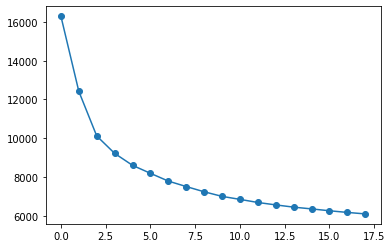

In [14]:
plt.plot(lst_in,marker='o')

In [15]:
cl = KMeans(n_clusters=4)

In [16]:
cl.fit(X_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
X['cl'] = df['cl'] = X_s['cl'] = cl.predict(X_s)

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.cl.value_counts(normalize=True)

2    0.319346
0    0.288051
3    0.281212
1    0.111391
Name: cl, dtype: float64

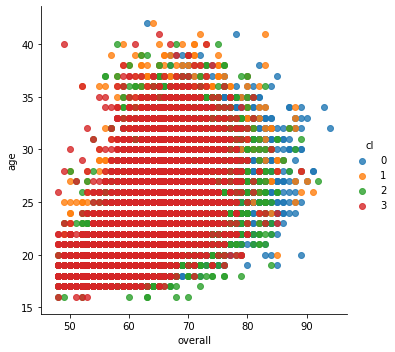

In [21]:
sns.lmplot(data=X,x='overall',y='age',hue='cl',fit_reg=False)